In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.ensemble import AdaBoostClassifier

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#importing libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from math import sqrt

import sklearn.utils
from sklearn.preprocessing import RobustScaler #Scaling the features
from sklearn.model_selection import StratifiedShuffleSplit #Splitting the dataset
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, make_scorer, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score, auc
from sklearn.model_selection import GridSearchCV #hyperparameter tuning
from sklearn.decomposition import PCA

#Visual Analysis
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import IPython

from imblearn.over_sampling import ADASYN #Adaptive Synthetic Oversampling
from collections import Counter
from scipy import stats

#Neural Networks implementation
import keras
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from keras.utils.vis_utils import plot_model

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier


#EDA

In [ ]:
# Loading the data
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# As time is given in relative fashion, we are using pandas.Timedelta which Represents a duration, the difference between two times or dates.
Delta_Time = pd.to_timedelta(df['Time'], unit='s')

#Create derived columns Mins and hours
df['Time_Day'] = (Delta_Time.dt.components.days).astype(int)
df['Time_Hour'] = (Delta_Time.dt.components.hours).astype(int)
df['Time_Min'] = (Delta_Time.dt.components.minutes).astype(int)

In [ ]:
# Drop unnecessary columns
# We will drop Time,as we have derived the Day/Hour/Minutes from the time column 
df.drop('Time', axis = 1, inplace= True)
# We will keep only derived column hour, as day/minutes might not be very useful
df.drop(['Time_Day', 'Time_Min'], axis = 1, inplace= True)

In [ ]:
# Splitting the dataset into X and y
y= df['Class']
X = df.drop(['Class'], axis=1)

In [ ]:
# Splitting the dataset using train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.20)

In [ ]:
# Checking the spread of data post split
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
396
96


In [ ]:
#Standardizing the Amount column (All other 'V' columns are already scaled as they've undergone PCA transformation).
Rob_scaler=RobustScaler() #Robust to outliers
df['Std_Amount'] = Rob_scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,Amount,Class,Time_Hour,Std_Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0,1.783274
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0,-0.269825
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0,4.983721
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0,1.418291
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0,0.670579


In [ ]:
# Accumulating all the column names under one variable
cols = list(X.columns.values)

Embedded Model

In [ ]:
#defining the classifier for ensemble models

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(n_estimators=30, random_state=1)
clf3 = GaussianNB()


Embedded with weight class

In [ ]:
# Define the three classifiers to use in the ensemble
clf1_weight= LogisticRegression(class_weight={0:1, 1:15},
                          random_state=5,
                          solver='liblinear')

clf2_weight = RandomForestClassifier(class_weight={0:1, 1:12}, 
                              criterion='gini', 
                              max_depth=8, 
                              max_features='log2',
                              min_samples_leaf=10, 
                              n_estimators=30, 
                              n_jobs=-1,
                              random_state=5)

clf3_weight = GaussianNB()
                             

Create Dataframe and Confusion Matrix Function 

In [ ]:
#Create a dataframe to store results
df_Results = pd.DataFrame(columns=['Methodology','Model','Accuracy','roc_value','threshold'])

In [ ]:
# Created a common function to plot confusion matrix
def Plot_confusion_matrix(y_test, predicted_test):
  cm = confusion_matrix(y_test, predicted_test)
  plt.clf()
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Accent)
  categoryNames = ['Non-Fraudalent','Fraudalent']
  plt.title('Confusion Matrix - Test Data')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  ticks = np.arange(len(categoryNames))
  plt.xticks(ticks, categoryNames, rotation=45)
  plt.yticks(ticks, categoryNames)
  s = [['TN','FP'], ['FN', 'TP']]
  
  for i in range(2):
      for j in range(2):
          plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
  plt.show()

In [ ]:
#function with simple Ensamble models

def Ensemblemodels(df_Results,Methodology, X_train,y_train, X_test, y_test ):

  #create Ensemble model and fit the model with train dataset
  knn = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2),('nb',clf3)],voting='hard')
  knn.fit(X_train,y_train)
  score = knn.score(X_test,y_test)
  print("model score")
  print(score)
  
  #Accuracy
  y_pred = knn.predict(X_test)
  KNN_Accuracy = metrics.accuracy_score(y_pred=y_pred, y_true=y_test)
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred)
  print("classification Report")
  print(classification_report(y_test, y_pred))
  df_Results = df_Results.append(pd.DataFrame({'Methodology': Methodology,'Model': 
                                               'KNN','Accuracy': score,
                                               }, 
                                              index=[0]),ignore_index= True)
  return df_Results

In [ ]:
#with Weight Class function

def Ensemblemodels_weight(df_Results,Methodology, X_train,y_train, X_test, y_test ):

  #create Ensemble model and fit the model with train dataset
  knn_weight = VotingClassifier(estimators=[('lr', clf1_weight), ('rf', clf2_weight),('DT',clf3_weight)],voting='hard')
  knn_weight.fit(X_train,y_train)
  score = knn_weight.score(X_test,y_test)
  print("model score")
  print(score)
  
  #Accuracy
  y_pred = knn_weight.predict(X_test)
  KNN_Accuracy = metrics.accuracy_score(y_pred=y_pred, y_true=y_test)
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred)
  print("classification Report")
  print(classification_report(y_test, y_pred))
  df_Results = df_Results.append(pd.DataFrame({'Methodology': Methodology,'Model': 
                                               'knn_weight','Accuracy': score,
                                               }, 
                                              index=[0]),ignore_index= True)
  return df_Results

#Machine Learning 

In [ ]:
# Creating the dataset with RandomOverSampler and StratifiedKFold
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    ROS = RandomOverSampler(sampling_strategy=0.5)
    X_over, y_over= ROS.fit_resample(X_train, y_train)
  
X_over = pd.DataFrame(data=X_over, columns=cols)

Embedded Model with Random Sampling


ensamble Modelwith oversampling
model score
0.9969803900914661
Confusion Matrix


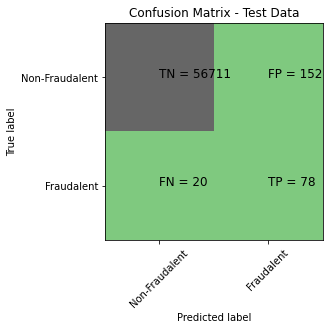

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.34      0.80      0.48        98

    accuracy                           1.00     56961
   macro avg       0.67      0.90      0.74     56961
weighted avg       1.00      1.00      1.00     56961

Time Taken by Model: --- 71.03835225105286 seconds ---
------------------------------------------------------------


In [ ]:
#Run embedded Model with Random Oversampling
Data_Imbalance_Handiling	 = "Random Oversampling with StratifiedKFold CV "

print("ensamble Modelwith oversampling")
start_time = time.time()
df_Results = Ensemblemodels(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )


ensamble Modelwith oversampling
model score
0.9891329155035902
Confusion Matrix


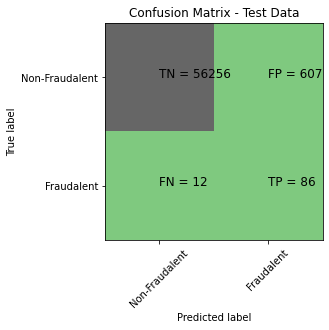

classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56863
           1       0.12      0.88      0.22        98

    accuracy                           0.99     56961
   macro avg       0.56      0.93      0.61     56961
weighted avg       1.00      0.99      0.99     56961

Time Taken by Model: --- 30.66797423362732 seconds ---
------------------------------------------------------------


In [ ]:
#Run embedded Model weight Class with Random Oversampling
Data_Imbalance_Handiling	 = "Random Oversampling with StratifiedKFold CV "

print("ensamble Modelwith oversampling")
start_time = time.time()
df_Results = Ensemblemodels_weight(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*60 )

Embedded Model with ADASYN Oversampling

In [ ]:
# Creating dataframe with ADASYN and StratifiedKFold
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    ADASYN = over_sampling.ADASYN(random_state=0)
    X_train_ADASYN, y_train_ADASYN= ADASYN.fit_resample(X_train, y_train)
  
X_train_ADASYN = pd.DataFrame(data=X_train_ADASYN,   columns=cols)

ADASYN Oversampling with StratifiedKFold CV Ensamble 
model score
0.9947859061463107
Confusion Matrix


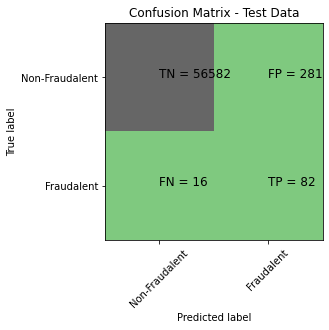

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.23      0.84      0.36        98

    accuracy                           0.99     56961
   macro avg       0.61      0.92      0.68     56961
weighted avg       1.00      0.99      1.00     56961

Time Taken by Model: --- 145.04383492469788 seconds ---
--------------------------------------------------------------------------------


In [ ]:
Data_Imbalance_Handiling	 = "ADASYN Oversampling with StratifiedKFold CV "
#Run embedded model with ADASYN
print("ADASYN Oversampling with StratifiedKFold CV Ensamble ")
start_time = time.time()
df_Results = Ensemblemodels(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )


ADASYN Oversampling with StratifiedKFold CV Ensamble 
model score
0.9339372553150401
Confusion Matrix


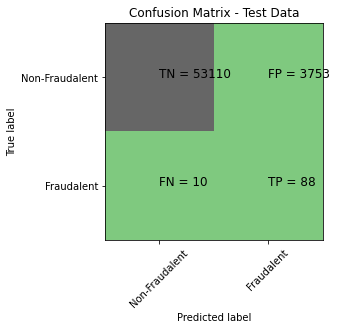

classification Report
              precision    recall  f1-score   support

           0       1.00      0.93      0.97     56863
           1       0.02      0.90      0.04        98

    accuracy                           0.93     56961
   macro avg       0.51      0.92      0.51     56961
weighted avg       1.00      0.93      0.96     56961

Time Taken by Model: --- 45.117703437805176 seconds ---
--------------------------------------------------------------------------------


In [ ]:
Data_Imbalance_Handiling	 = "ADASYN Oversampling with StratifiedKFold CV "
#Run embedded model with Weight with ADASYN 
print("ADASYN Oversampling with StratifiedKFold CV Ensamble ")
start_time = time.time()
df_Results = Ensemblemodels_weight(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

Embedded Model With SMote Sampling Techniaues 

In [ ]:
# Creating dataframe with Smote and StratifiedKFold
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    SMOTE = over_sampling.SMOTE(random_state=0)
    X_train_Smote, y_train_Smote= SMOTE.fit_resample(X_train, y_train)
  
X_train_Smote = pd.DataFrame(data=X_train_Smote,   columns=cols)

SMOTE Oversampling with StratifiedKFold CV Model
model score
0.9976826249539158
Confusion Matrix


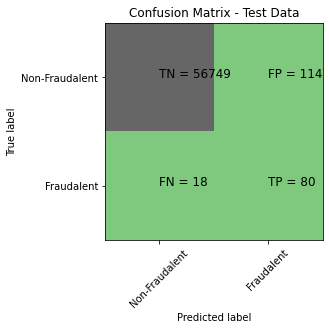

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.41      0.82      0.55        98

    accuracy                           1.00     56961
   macro avg       0.71      0.91      0.77     56961
weighted avg       1.00      1.00      1.00     56961

Time Taken by Model: --- 147.03371953964233 seconds ---
--------------------------------------------------------------------------------


In [ ]:

Data_Imbalance_Handiling	 = "SMOTE Oversampling with StratifiedKFold CV "

print("SMOTE Oversampling with StratifiedKFold CV Model")
start_time = time.time()
df_Results = Ensemblemodels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

SMOTE Oversampling with StratifiedKFold CV Model
model score
0.9683467635750777
Confusion Matrix


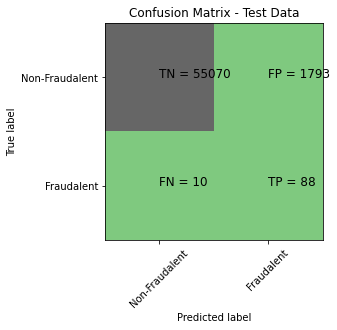

classification Report
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56863
           1       0.05      0.90      0.09        98

    accuracy                           0.97     56961
   macro avg       0.52      0.93      0.54     56961
weighted avg       1.00      0.97      0.98     56961

Time Taken by Model: --- 45.47680449485779 seconds ---
--------------------------------------------------------------------------------


In [ ]:
Data_Imbalance_Handiling	 = "SMOTE Oversampling with StratifiedKFold CV "

print("SMOTE Oversampling with StratifiedKFold CV Model")
start_time = time.time()
df_Results = Ensemblemodels_weight(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

#DEEP LEARNING MOdels

Building Model 1 hidden lyar

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 65)                2015      
                                                                 
 dense_1 (Dense)             (None, 1)                 66        
                                                                 
Total params: 2,081
Trainable params: 2,081
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
650/650 - 4s - loss: 0.3889 - accuracy: 0.9516 - val_loss: 0.0439 - val_accuracy: 0.9879 - 4s/epoch - 6ms/step
Epoch 2/30
650/650 - 2s - loss: 0.0578 - accuracy: 0.9871 - val_loss: 0.0257 - val_accuracy: 0.9921 - 2s/epoch - 3ms/step
Epoch 3/30
650/650 - 2s - loss: 0.0421 - accuracy: 0.9911 - val_loss: 0.0189 - val_accuracy: 0.9955 - 2s/epoch - 3ms/step
Epoch 4/30
650/650 - 2s - loss: 0.0462 - accuracy: 0.9922 - val_loss: 0.0176 - val_a

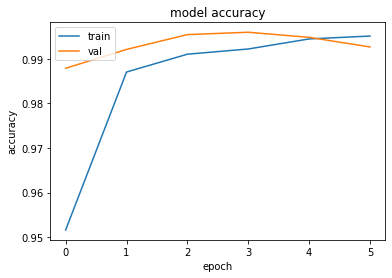

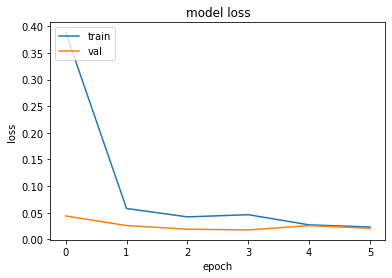

Confusion Matrix for DEEP Learning


#Deep Learning Models with X_train_ADASYN

In [ ]:
Y_pred_cls = Model1.predict(X_test, batch_size=200, verbose=0)
print('Accuracy Model1 (Dropout): '+ str(Model1.evaluate(X_test,y_test)[1]))
print('Recall_score: ' + str(recall_score(y_test,Fraud)))
print('Precision_score: ' + str(precision_score(y_test, Fraud)))
print('F-score: ' + str(f1_score(y_test,Fraud)))



1781/1781 [==============================] - 6s 3ms/step - loss: 0.0385 - accuracy: 0.9913
Accuracy Model1 (Dropout): 0.9913274049758911
Recall_score: 0.8163265306122449
Precision_score: 0.06546644844517185
F-score: 0.1212121212121212


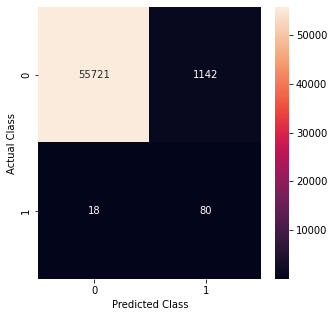

In [ ]:
conf_matrix(y_test,Fraud)

#Deep Learning With Oversampling

In [ ]:
#Training a Multi-layer perceptron with 1 hidden layer on Oversampled dataset without using dropout and, using the parameters tuned above.
n_inputs = X_over.shape[1]
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=2,
                              verbose=0, mode='min', restore_best_weights= True)
#Model Creation
OversamplingModel = Sequential()
OversamplingModel.add(Dense(65, input_shape=(n_inputs, ), kernel_initializer='he_normal', activation='relu'))
OversamplingModel.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

#Compile Model
OversamplingModel.compile(Adam(lr=0.01), loss='binary_crossentropy', metrics=['accuracy'])
OversamplingModel.summary()

#Fit Model
Result1= OversamplingModel.fit(X_over, y_over, validation_data=(X_over,y_over), batch_size=700, epochs=30, callbacks=[es], shuffle=True, verbose=2)
print(Result1.history.keys())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 65)                2015      
                                                                 
 dense_7 (Dense)             (None, 1)                 66        
                                                                 
Total params: 2,081
Trainable params: 2,081
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
488/488 - 3s - loss: 0.2215 - accuracy: 0.9583 - val_loss: 0.1556 - val_accuracy: 0.9733 - 3s/epoch - 6ms/step
Epoch 2/30
488/488 - 2s - loss: 0.0633 - accuracy: 0.9836 - val_loss: 0.0295 - val_accuracy: 0.9903 - 2s/epoch - 3ms/step
Epoch 3/30
488/488 - 2s - loss: 0.0529 - accuracy: 0.9867 - val_loss: 0.0231 - val_accuracy: 0.9938 - 2s/epoch - 3ms/step
Epoch 4/30
488/488 - 2s - loss: 0.0434 - accuracy: 0.9893 - val_loss: 0.0178 - val

In [ ]:
Oversampling_predict_Value = OversamplingModel.predict(X_test, batch_size=200, verbose=0)

In [ ]:
POSITIVE_FRAUD_THRESHOLD = 0.05
NEGATIVE_FRAUD_THRESHOLD = -0.05
Overfraud = []
for fraud_score in Oversampling_predict_Value:
  if fraud_score >= POSITIVE_FRAUD_THRESHOLD:
    Overfraud.append(1)
  else:
    Overfraud.append(0)
Overfraud 

[0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [ ]:

print('Accuracy Model1 (Dropout): '+ str(Model1.evaluate(X_test,y_test)[1]))
print('Recall_score: ' + str(recall_score(y_test,Overfraud)))
print('Precision_score: ' + str(precision_score(y_test, Overfraud)))
print('F-score: ' + str(f1_score(y_test,Overfraud)))


1781/1781 [==============================] - 3s 1ms/step - loss: 0.0184 - accuracy: 0.9969
Accuracy Model1 (Dropout): 0.9968926310539246
Recall_score: 0.7653061224489796
Precision_score: 0.07845188284518828
F-score: 0.14231499051233398


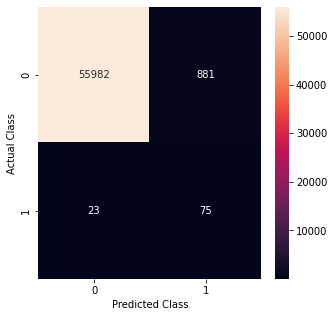

In [ ]:
conf_matrix(y_test,Overfraud)

#DEEp Learning with SMOTE

In [ ]:
#Training a Multi-layer perceptron with 1 hidden layer on Oversampled dataset without using dropout and, using the parameters tuned above.
n_inputs = X_train_Smote.shape[1]
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=2,
                              verbose=0, mode='min', restore_best_weights= True)
#Model Creation
SMOTEModel = Sequential()
SMOTEModel.add(Dense(65, input_shape=(n_inputs, ), kernel_initializer='he_normal', activation='relu'))
SMOTEModel.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

#Compile Model

SMOTEModel.compile(Adam(lr=0.01), loss='binary_crossentropy', metrics=['accuracy'])
SMOTEModel.summary()

#Fit Model
Result2=SMOTEModel.fit(X_train_Smote, y_train_Smote, validation_data=(X_train_Smote,y_train_Smote), batch_size=700, epochs=30, callbacks=[es], shuffle=True, verbose=2)
print(Result2.history.keys())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 65)                2015      
                                                                 
 dense_11 (Dense)            (None, 1)                 66        
                                                                 
Total params: 2,081
Trainable params: 2,081
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
650/650 - 3s - loss: 0.1384 - accuracy: 0.9695 - val_loss: 0.0568 - val_accuracy: 0.9870 - 3s/epoch - 5ms/step
Epoch 2/30
650/650 - 2s - loss: 0.0421 - accuracy: 0.9907 - val_loss: 0.0271 - val_accuracy: 0.9922 - 2s/epoch - 3ms/step
Epoch 3/30
650/650 - 3s - loss: 0.0293 - accuracy: 0.9933 - val_loss: 0.0159 - val_accuracy: 0.9958 - 3s/epoch - 4ms/step
Epoch 4/30
650/650 - 3s - loss: 0.0242 - accuracy: 0.9947 - val_loss: 0.0166 - val

In [ ]:
SMOTE_predict_Value = SMOTEModel.predict(X_test, batch_size=200, verbose=0)

In [ ]:
POSITIVE_FRAUD_THRESHOLD = 0.05
NEGATIVE_FRAUD_THRESHOLD = -0.05
SMOTEfraud = []
for fraud_score in SMOTE_predict_Value:
  if fraud_score >= POSITIVE_FRAUD_THRESHOLD:
    SMOTEfraud.append(1)
  else:
    SMOTEfraud.append(0)
SMOTEfraud 

[1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [ ]:
print('Accuracy Model1 (Dropout): '+ str(SMOTEModel.evaluate(X_test,y_test)[1]))
print('Recall_score: ' + str(recall_score(y_test,SMOTEfraud)))
print('Precision_score: ' + str(precision_score(y_test, SMOTEfraud)))
print('F-score: ' + str(f1_score(y_test,SMOTEfraud)))

1781/1781 [==============================] - 2s 1ms/step - loss: 0.0157 - accuracy: 0.9963
Accuracy Model1 (Dropout): 0.9962781667709351
Recall_score: 0.8367346938775511
Precision_score: 0.1003671970624235
F-score: 0.17923497267759564


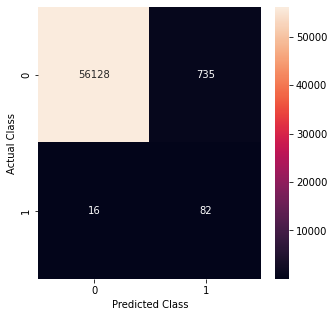

In [ ]:
conf_matrix(y_test,SMOTEfraud)

In [ ]:
#Training a Multi-layer perceptron with 1 hidden layer on Oversampled dataset using the parameters tuned above and adding a Dropout.
n_inputs = X_train_ADASYN.shape[1]
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=2,
                              verbose=0, mode='min', restore_best_weights= True)
Model1_drop = Sequential()
Model1_drop.add(Dense(65, input_shape=(n_inputs, ), kernel_initializer='he_normal', activation='relu'))
Model1_drop.add(Dropout(0.5))
Model1_drop.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

Model1_drop.compile(Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
Model1_drop.summary()

history2= Model1_drop.fit(X_train_ADASYN, y_train_ADASYN, validation_data=(Xval_arr, Yval_arr), batch_size=700, epochs=50, callbacks=[es], shuffle=True, verbose=2)
print(history2.history.keys())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 65)                2015      
                                                                 
 dropout (Dropout)           (None, 65)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 66        
                                                                 
Total params: 2,081
Trainable params: 2,081
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
650/650 - 4s - loss: 4.4894 - accuracy: 0.8061 - val_loss: 0.1555 - val_accuracy: 0.9469 - 4s/epoch - 6ms/step
Epoch 2/50
650/650 - 3s - loss: 0.1809 - accuracy: 0.9386 - val_loss: 0.0895 - val_accuracy: 0.9679 - 3s/epoch - 5ms/step
Epoch 3/50
650/650 - 3s - loss: 0.1154 - accuracy: 0.9596 - val_loss: 0.

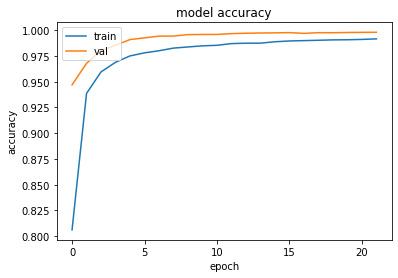

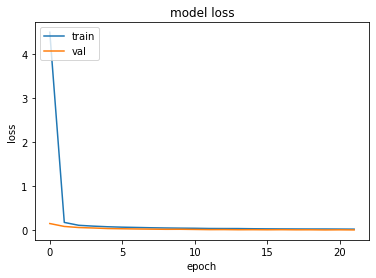

In [ ]:
# summarize history for accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Deep Learning with SMOTE

In [ ]:
#Training a Multi-layer perceptron with 1 hidden layer on Oversampled dataset without using dropout and, using the parameters tuned above.
n_inputs = X_train_ADASYN.shape[1]
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=2,
                              verbose=0, mode='min', restore_best_weights= True)
#Model Creation
Model1 = Sequential()
Model1.add(Dense(65, input_shape=(n_inputs, ), kernel_initializer='he_normal', activation='relu'))
Model1.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

#Compile Model
Model1.compile(Adam(lr=0.01), loss='binary_crossentropy', metrics=['accuracy'])
Model1.summary()

#Fit Model
history3= Model1.fit(X_train_Smote, y_train_Smote, validation_data=(Xval_arr, Yval_arr), batch_size=700, epochs=30, callbacks=[es], shuffle=True, verbose=2)
print(history3.history.keys())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 65)                2015      
                                                                 
 dense_5 (Dense)             (None, 1)                 66        
                                                                 
Total params: 2,081
Trainable params: 2,081
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
650/650 - 3s - loss: 0.1872 - accuracy: 0.9730 - val_loss: 0.0333 - val_accuracy: 0.9906 - 3s/epoch - 5ms/step
Epoch 2/30
650/650 - 2s - loss: 0.0621 - accuracy: 0.9897 - val_loss: 0.0284 - val_accuracy: 0.9938 - 2s/epoch - 4ms/step
Epoch 3/30
650/650 - 3s - loss: 0.0429 - accuracy: 0.9937 - val_loss: 0.0336 - val_accuracy: 0.9926 - 3s/epoch - 4ms/step
Epoch 4/30
650/650 - 2s - loss: 0.0335 - accuracy: 0.9942 - val_loss: 0.0085 - val

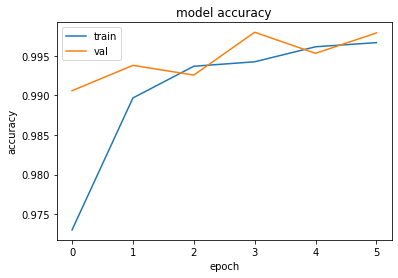

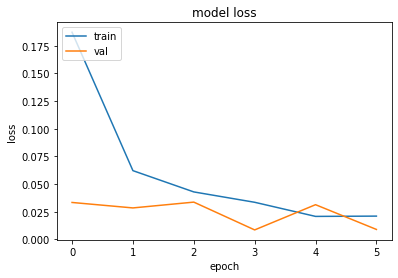

In [ ]:
# summarize history for accuracy
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
Y_pred_cls = Model1.predict(Xtest_arr, batch_size=200, verbose=0)
print(Y_pred_cls)

[[3.04660201e-03]
 [1.00000000e+00]
 [1.07712285e-05]
 ...
 [9.27858109e-19]
 [3.00886954e-11]
 [2.43659019e-02]]


In [ ]:
POSITIVE_FRAUD_THRESHOLD = 0.05
NEGATIVE_FRAUD_THRESHOLD = -0.05
Fraud = []
for fraud_score in Y_pred_cls:
  if fraud_score >= POSITIVE_FRAUD_THRESHOLD:
    Fraud.append(1)
  else:
    Fraud.append(0)
Fraud 

[0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [ ]:
print('Accuracy Model1 (Dropout): '+ str(Model1.evaluate(Xtest_arr,Ytest_arr)[1]))
print('Recall_score: ' + str(recall_score(y_test,Fraud)))
print('Precision_score: ' + str(precision_score(y_test, Fraud)))
print('F-score: ' + str(f1_score(y_test,Fraud)))
#confusion_matrix(Fraud)

1781/1781 [==============================] - 7s 4ms/step - loss: 0.0221 - accuracy: 0.9956
Accuracy Model1 (Dropout): 0.9956285953521729
Recall_score: 0.826530612244898
Precision_score: 0.11408450704225352
F-score: 0.2004950495049505


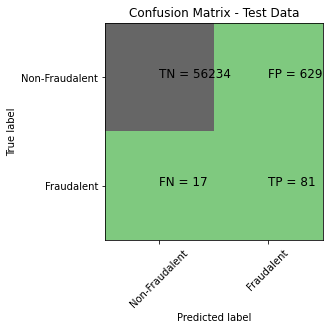

In [ ]:
Plot_confusion_matrix(y_test, Fraud)